# Imports

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

question - how often mental health related issues interfer with work?
given different resources(eduction, benefits, counseling, workfrom home) companies provide 

Work interference - If you have a mental health condition, do you feel that it interferes with your work?

remote work- Do you work remotely (outside of an office) at least 50% of the time?

benefits - Does your employer provide mental health benefits?

care options - Do you know the options for mental health care your employer provides?

wellness program - Has your employer ever discussed mental health as part of an employee wellness program?

seek help - Does your employer provide resources to learn more about mental health issues and how to seek help?

annonimity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment

leave - How easy is it for you to take medical leave for a mental health condition?

mental health conseq - Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence - Do you think that discussing a physical health issue with your employer would have negative consequences?

treatment- Have you sought treatment for a mental health condition?


# EDA

In [342]:
df = pd.read_csv('data.csv')
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [343]:
#Dropping columns not necessary for data analysis
df.drop(['Timestamp', 'comments', 'state', 'Country', 'phys_health_interview', 'phys_health_consequence'],
        axis=1, inplace=True)


#Dropping nan values and changing age column to intg.
df.work_interfere.dropna(inplace=True)
df.self_employed.dropna(inplace=True)
df['Age'] = df['Age'].astype(int)


In [344]:
# creating a uniform values for vairous unique gender values

df['Gender'] = df['Gender'].replace({'f':'F'})
df['Gender'] = df['Gender'].replace({'female':'F'})
df['Gender'] = df['Gender'].replace({'Male':'M'})
df['Gender'] = df['Gender'].replace({'male':'M'})
df['Gender'] = df['Gender'].replace({'Female':'F'})
df['Gender'] = df['Gender'].replace({'m':'M'})
df['Gender'] = df['Gender'].replace({'Make':'M'})
df['Gender'] = df['Gender'].replace({'Woman':'F'})
df['Gender'] = df['Gender'].replace({'Man':'M'})
df['Gender'] = df['Gender'].replace({'Femake':'F'})
df['Gender'] = df['Gender'].replace({'Malr':'M'})
df['Gender'] = df['Gender'].replace({'Mail':'M'})
df['Gender'] = df['Gender'].replace({'femail':'F'})
df['Gender'] = df['Gender'].replace({'Female ':'F'})
df['Gender'] = df['Gender'].replace({'Female (trans)':'trans'})
df['Gender'] = df['Gender'].replace({'Trans-female':'trans'})
df['Gender'] = df['Gender'].replace({'Trans woman':'trans'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'cis-female/femme':'F'})
df['Gender'] = df['Gender'].replace({'cis male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Man':'M'})
df['Gender'] = df['Gender'].replace({'maile':'M'}) 
df['Gender'] = df['Gender'].replace({'Mal':'M'})
df['Gender'] = df['Gender'].replace({'Cis Female':'F'})
df['Gender'] = df['Gender'].replace({'woman':'F'})
df['Gender'] = df['Gender'].replace({'Female (cis)':'F'})
df['Gender'] = df['Gender'].replace({'Male ':'M'})
df['Gender'] = df['Gender'].replace({'Male (CIS)':'M'})
df['Gender'] = df['Gender'].replace({'msle':'M'})
df['Gender'] = df['Gender'].replace({'queer/she/they':'queer'})
df['Gender'] = df['Gender'].replace({'queer':'queer'})
df['Gender'] = df['Gender'].replace({'Genderqueer':'queer'})
df['Gender'] = df['Gender'].replace({'fluid':'queer'})
df['Gender'] = df['Gender'].replace({'non-binary':'queer'})
df['Gender'] = df['Gender'].replace({'Androgyne':'queer'})
df['Gender'] = df['Gender'].replace({'male leaning androgynous':'queer'})
df['Gender'] = df['Gender'].replace({'Agender':'queer'})
df['Gender'] = df['Gender'].replace({'something kinda male?':'other'})
df['Gender'] = df['Gender'].replace({'Nah':'other'})
df['Gender'] = df['Gender'].replace({'Agender':'other'})
df['Gender'] = df['Gender'].replace({'Neuter':'other'})
df['Gender'] = df['Gender'].replace({'p':'other'})
df['Gender'] = df['Gender'].replace({'Guy (-ish) ^_^':'other'})
df['Gender'] = df['Gender'].replace({'Male-ish':'other'})
df['Gender'] = df['Gender'].replace({'A little about you':'other'})
df['Gender'] = df['Gender'].replace({'Enby':'other'})
df['Gender'] = df['Gender'].replace({'All':'other'})
df['Gender'] = df['Gender'].replace({'ostensibly male, unsure what that really means':'other'})

In [345]:
#consoldating two employee sizes

df['no_employees'] = df['no_employees'].replace({'1-5':'1-25'})
df['no_employees'] = df['no_employees'].replace({'6-25':'1-25'})

In [346]:
df.self_employed.dropna(axis=0, inplace=True)
#df.self_employed.isna().sum()

In [347]:
#Dropping all null values in df
df.dropna(inplace=True)

In [348]:
#Replacing unique(incorrectly entered age values with 1 in order to change it with the mean after)

for age in df.Age.values:
    if age <= 17 or age >= 80:
        df.Age.replace(age, 1, inplace=True)
        

In [349]:
#changing ones with the column mean and rounding it in to two 
df['Age'] = df['Age'].replace({1:df.Age.mean()})
df.Age = df.Age.round(2)

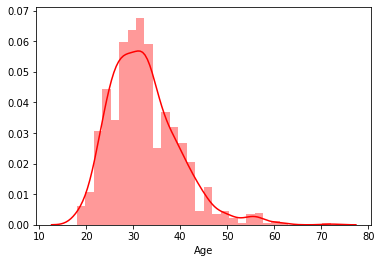

In [350]:
#Age distribution plot
y = df.Age

sns.distplot(y, color='r')

plt.xlabel=('Age')
plt.title=('Age Distribution')

In [351]:
a = df.Gender.value_counts()[0]
b = df.Gender.value_counts()[1]
c = df.Gender.value_counts()[2]
d = df.Gender.value_counts()[3]
e = df.Gender.value_counts()[4]

In [298]:
# data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# # Create the pandas DataFrame 
# df = pd.DataFrame(data, columns = ['Name', 'Age']) 
  

In [299]:
# data = [[]]

In [352]:
# g = df.Gender.value_counts()

# sns.barplot(g)

In [353]:
#Target and independent variables

X = df.drop('work_interfere', axis=1)
y = df['work_interfere']

In [354]:
y.value_counts()

Sometimes    458
Never        207
Rarely       170
Often        142
Name: work_interfere, dtype: int64

# Creating Sets¶


In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

In [356]:
cont = X_train.select_dtypes(exclude='object')

cat = X_train.select_dtypes(include='object')

In [357]:
y_train.value_counts()

Sometimes    361
Never        164
Rarely       139
Often        117
Name: work_interfere, dtype: int64

# One hot encoder


In [358]:
ohe = OneHotEncoder(drop='first')

In [359]:
train = ohe.fit_transform(cat).toarray()

In [360]:
train_df= pd.DataFrame(train, columns=ohe.get_feature_names(cat.columns))
train_df.head()

,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,...,mental_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [361]:
train_df.reset_index(inplace=True, drop=True)

In [362]:
cont.reset_index(inplace=True, drop=True)

In [363]:
X_train = train_df.join(cont)

In [364]:
X_train.head()

,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,Age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,49.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0


# SMOTE

SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [365]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=28)
X_sampled, y_sampled = sm.fit_sample(X_train, y_train)

In [366]:
y_sampled.value_counts()

Never        361
Often        361
Sometimes    361
Rarely       361
Name: work_interfere, dtype: int64

# Random Forest

In [454]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=28, max_depth=5)

forest_model= forest.fit(X_sampled, y_sampled)

In [455]:
forest_model.score(X_sampled, y_sampled)

0.731994459833795

In [451]:
forest_model.feature_importances_.shape

(39,)

In [463]:
feature_imp = forest_model.feature_importances_

In [456]:
forest_classes = pd.DataFrame(forest_model.feature_importances_)

#forest_classes.columns = 

#X_sampled.columns
forest_classes.T

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.028925,0.000364,0.000089,0.000394,0.032418,0.099172,0.244688,0.008969,0.024792,0.010079,...,0.016053,0.010519,0.015375,0.013826,0.022109,0.003501,0.012559,0.009629,0.023998,0.036184


In [417]:
# features = pd.DataFrame(X_train.columns.values)
# features['feature_importances'] = forest_model.feature_importances_


# features.columns = ['features','feature_importances']

# features= features.sort_values(by=['feature_importances'], ascending=False)
# features.reset_index(drop='first', inplace= True)
# features.head(2)

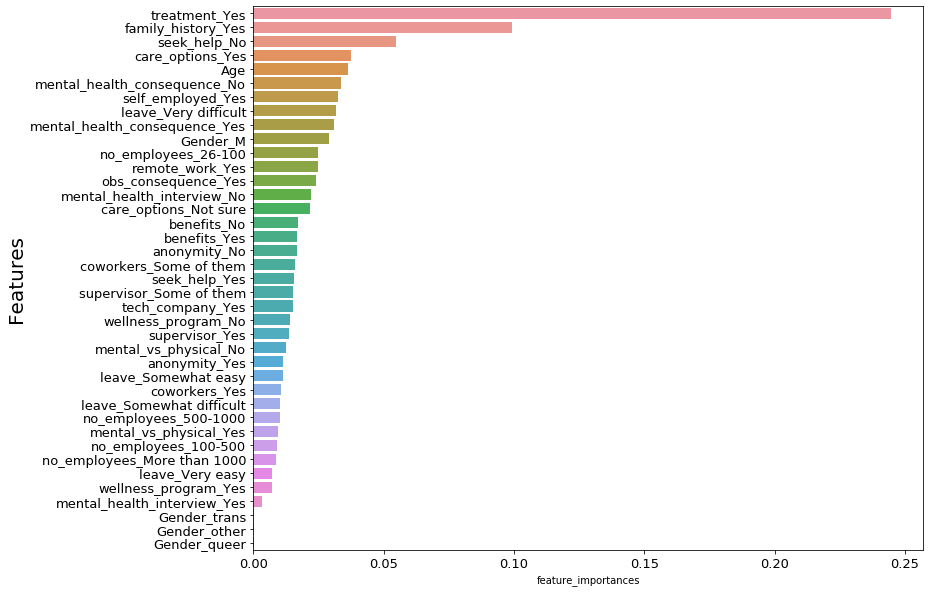

In [370]:
y = features.feature_importances
x = features.features

plt.figure(figsize=(12, 10))
sns.barplot(y, x)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

plt.ylabel('Features', fontsize=20)
#plt.xlabel('feature_importances', fontsize=20)

plt.show()

In [380]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_model = tree_clf.fit(X_sampled, y_sampled)

In [381]:
tree_model.score(X_sampled, y_sampled)

0.5948753462603878

In [387]:
#pred = tree_model.predict(X_test)

# Confusion matrix and classification report
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

# Logistic Regression 

In [371]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e12, solver='liblinear', random_state=28)

log_model = logreg.fit(X_sampled, y_sampled)

In [372]:
log_model.score(X_sampled, y_sampled)

0.5761772853185596

In [373]:
df_coef = pd.DataFrame(model.coef_, index=model.classes_)

In [423]:
df_coef.columns = X_sampled.columns
df_coef

,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,Age
Never,0.455329,-1.500627,0.956426,-0.846008,0.147103,-0.992507,-3.021669,1.024926,0.819992,1.639639,...,-0.473699,-0.509100,0.149379,0.382492,-0.134126,0.563666,-0.012133,0.004381,-0.285344,0.027821
Often,-0.125303,-0.346879,-3.947932,1.883901,0.517752,0.064311,1.294394,-0.627894,-0.320979,-6.086228,...,-0.511324,0.045549,0.446681,0.656613,-0.501768,-0.351309,-0.102035,-0.064158,0.254293,-0.024232
Rarely,-0.199666,-0.169036,0.423414,-2.609111,-0.722708,-0.001094,0.276074,-0.149602,-0.711187,0.009033,...,-0.037605,0.228690,-0.600702,-0.540183,0.202117,0.114090,-0.185739,-0.406631,-0.151559,0.002011
Sometimes,-0.024751,0.013440,0.283770,-1.380331,-0.054772,0.363561,1.059379,-0.034666,0.196162,-0.148271,...,0.404584,0.011310,0.060823,-0.199511,0.305544,-0.005163,0.134877,0.298344,-0.050341,-0.000370


In [459]:
#sns.barplot(df_coef.index, df_coef.columns)

# PCA

In [375]:
from sklearn.decomposition import PCA
pca = PCA()
p_df = pca.fit(X_sampled)

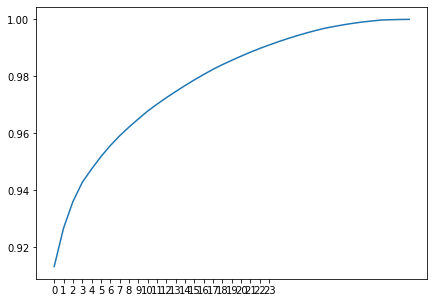

In [376]:
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(p_df.explained_variance_ratio_))
plt.xticks(range(24))
plt.show()

In [391]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50)

In [393]:
boost_model = abc.fit(X_sampled, y_sampled)

In [394]:
boost_model.score(X_sampled, y_sampled)

0.6018005540166205

In [398]:
boost_features = boost_model.feature_importances_
boost_columns = X_sampled.columns

In [406]:
a = pd.DataFrame(boost_features)


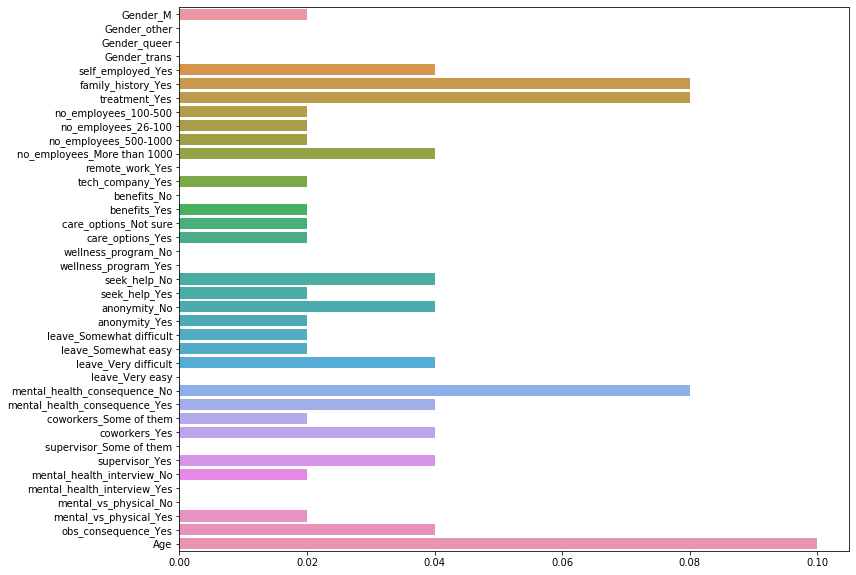

In [414]:
plt.figure(figsize=(12, 10))
sns.barplot(boost_features, boost_columns)